In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/june22-da/June22_DA.csv


**Hello There! I am doing my internship at CHEARS. I have been alloted the task to analyse a dataset and arrive at relevant conclusions.This dataset is basically about customer's behaviour towards purchase of everyday-need products either online or from stores ,alongwith the details about the customer.Firstly, let us convert our file into a DataFrame.**

In [2]:
JuneDA = pd.read_csv('../input/june22-da/June22_DA.csv',sep = "\t",engine ='python')
JuneDA.info()
#type(JuneDA)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

. 

In [3]:
#As the data type of the Dt_Customer was object type, 
#we have to convert it to the required data type
JuneDA['Dt_Customer']= pd.to_datetime(JuneDA['Dt_Customer'])
JuneDA['Dt_Customer'].value_counts()

2012-08-31    12
2012-12-09    11
2013-02-14    11
2014-12-05    11
2013-08-20    10
              ..
2012-05-08     1
2012-11-18     1
2013-05-25     1
2013-04-14     1
2014-09-01     1
Name: Dt_Customer, Length: 663, dtype: int64

**The customer registration data provided is of period 2012-2014.**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='count'>

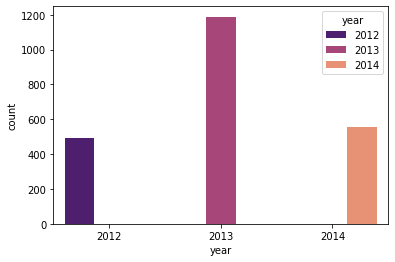

In [4]:
JuneDA['year']= pd.DatetimeIndex(JuneDA['Dt_Customer']).year
sns.countplot(JuneDA['year'],hue=JuneDA['year'],palette='magma')

**Number of customer enrollments have significantly declined from year 2013 to 2014**

**Is it that the company received many complaints from the company but didn't work on it?**

In [5]:
JuneDA['Complain'].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

**It doesn't seem so.**

**Is it that the majority of the constumers from 2012 and 2013 are repititive customers?**

In [6]:
customers_enrolled_in_2013_12 = JuneDA[(JuneDA['year']==2013) | (JuneDA['year']==2012) ]
print(customers_enrolled_in_2013_12['Recency'].value_counts().sum())
last_cust_month = customers_enrolled_in_2013_12[customers_enrolled_in_2013_12['Recency']<60]
print(last_cust_month['Recency'].value_counts().sum())
print('Percentage of customers enrolled in 2012 and 2013 have visited to the store in last two months(in Nov 2014) = '+str(last_cust_month['Recency'].value_counts().sum()/customers_enrolled_in_2013_12['Recency'].value_counts().sum()*100))

1683
1002
Percentage of customers enrolled in 2012 and 2013 have visited to the store in last two months(in Nov 2014) = 59.53654188948306


**Although the customer enrollments have decreased in 2014, In the period (Oct,2014 - Dec,2014), almost 60% of people enrolled in 2012 and 2013 have visited the company stores again!** 

**Let's create a dataframe consisting only the consumable products.**

In [7]:
consumable_products = JuneDA[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
consumable_products.info()
consumable_products_total = consumable_products.sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   MntWines          2240 non-null   int64
 1   MntFruits         2240 non-null   int64
 2   MntMeatProducts   2240 non-null   int64
 3   MntFishProducts   2240 non-null   int64
 4   MntSweetProducts  2240 non-null   int64
 5   MntGoldProds      2240 non-null   int64
dtypes: int64(6)
memory usage: 105.1 KB


**We will now see the information about the products purchased.**

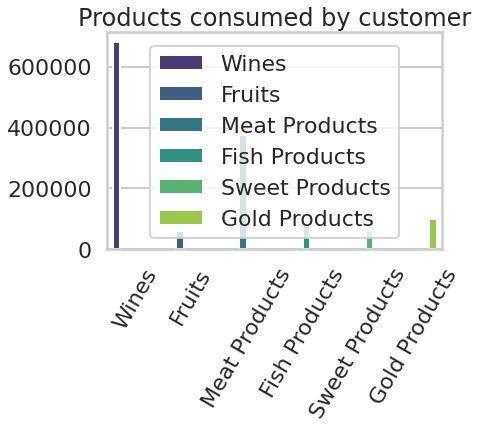

In [8]:
sns.set_context('poster')
sns.set_style('whitegrid')
g=sns.barplot(y=consumable_products_total.values,x=consumable_products_total.index,hue = ['Wines','Fruits','Meat Products','Fish Products','Sweet Products','Gold Products'],palette='viridis')
plt.title('Products consumed by customer')
plt.xticks(rotation =60)
g.set_xticklabels(['Wines','Fruits','Meat Products','Fish Products','Sweet Products','Gold Products'])
plt.show()

**We can observe that wines and Meat Products are majorly purchased from the company's stores.**
**Now let's check the whether people prefer company's online stores or offline stores.**

In [9]:
Onlinepurchases = JuneDA['NumWebPurchases'].sum()
print("Online Purchases = " + str(Onlinepurchases))
Offlinepurchases = JuneDA['NumStorePurchases'].sum()
print("Offline Purchases = " + str(Offlinepurchases))

Online Purchases = 9150
Offline Purchases = 12970


**We can observe that majority of people prefer offline stores.**

**Let's also check whether the products are purchased when there is a discount on it ,  or not.**


In [10]:
Discounted_purchase = JuneDA['NumDealsPurchases'].sum()
print('Discounted_purchase = '+ str(Discounted_purchase))
print('Percentage of customers purchasing something from store when there is a discount = '+ str(Discounted_purchase/(Onlinepurchases+Offlinepurchases)*100)+' %')

Discounted_purchase = 5208
Percentage of customers purchasing something from store when there is a discount = 23.544303797468356 %


**This tells us one interesting thing about consumer behavior. 1 out of 4 people buy an item with a discount on it.**

**Let's us check if the customers with higher income spend more on purchases or not**

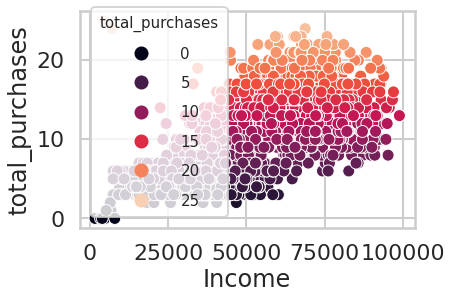

In [11]:
#Firstly,we will store the total number of purchases per customer in the dataframe
JuneDA['total_purchases']=JuneDA['NumWebPurchases']+JuneDA['NumStorePurchases']
sns.set_palette('RdBu')
sns.set_context('poster')
total_purchases = JuneDA[JuneDA['Income']<100000]
g=sns.scatterplot(x=total_purchases['Income'],y=JuneDA['total_purchases'],hue=JuneDA['total_purchases'],palette='rocket')
plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(g.get_legend().get_title(), fontsize='15')
plt.show()

**Well, people with higher income tend to purchase more product but there doesn't seem a strong relationship .Also here, we aren't considering the value of the respective items.**

**Let's check what is the percentage of people visiting online stores in the last month bought something from the online stores.**

In [12]:
last_month_web_purchases = JuneDA[JuneDA['Dt_Customer']>="2014-11-1"]
last_month_web_visits_sum= last_month_web_purchases['NumWebVisitsMonth'].sum()
last_month_web_purchases_sum =last_month_web_purchases['NumWebPurchases'].sum()
print('Percentage of people buying from the online store who visited the website = '+ str(last_month_web_purchases_sum/last_month_web_visits_sum*100)+ ' % ')


Percentage of people buying from the online store who visited the website = 74.16267942583733 % 


**It reflects that their online store has a good conversion rate.**

**Let's check the overall customer retention by the company, i.e. how frequently same customer visits the company stores.**

[Text(0.5, 0, "Number of Days since customer's last purchase"),
 Text(0, 0.5, 'Number of Customers')]

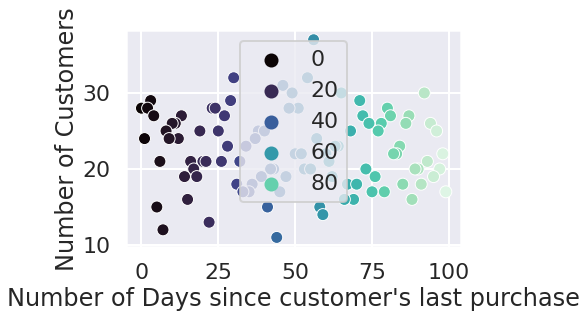

In [13]:
NumberOfDays= JuneDA['Recency'].value_counts()
sns.set_style('darkgrid')
sns.set_palette('PRGn')
g =sns.scatterplot(y=NumberOfDays.values,x=NumberOfDays.index,hue=NumberOfDays.index,palette='mako')
g.set(xlabel = "Number of Days since customer's last purchase", ylabel = "Number of Customers")



**The company has a good overall customer retention**

**People of what age majorly purchase something from the stores? Let's find out**

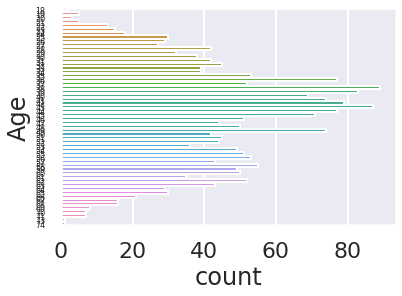

In [14]:

#As the data is from 2012-2014,to minimise errors, we will consider the year for age calculation as 2013-14

JuneDA['Age'] = 2014- JuneDA['Year_Birth']

JuneDA['Age'].value_counts()
sns.countplot(y=JuneDA['Age'][JuneDA['Age']<80])#removing outliers
plt.yticks(fontsize=8)
plt.show()



**People of Age Group 30-50 are major buyers from company's stores**

# Although the customer's enrolments in the company's stores have reduced significantly, the recency of the customers enrolled in the preceeding years have been quite high.This justify the genuinity and good reputationof the company.Since the conversion rate from a visitor to the buyer of the online stores have been quite high *(74% in the last month)*, in order to drive out more sales, the company should focus on online marketing targeting the region in which the stores are located for promoting their most sold products, i.e. meat products and wines.The company should also work on increasing web traffic to their online stores targeting potential buyers.

# 